<a href="https://colab.research.google.com/github/m-triassi/ai-projects-472/blob/main/Project1_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Task 

This Task consists of using the provided Drug dataset that contains multiple features of various drugs. The goal is to classify a particular drug into 1 of 5 categories: DrugA, DrugB, DrugC, DrugX, or DrugY

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os, os.path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# Mount Drive 
## Only for development purposes
from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
# Load Dataset
headers = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
!gdown --id 1owPFp6_Ouaoc_j6BU5utJ07ZRStfqDsW
drugs = pd.read_csv("/content/drug200.csv", header=None, names=headers)[1:]

Downloading...
From: https://drive.google.com/uc?id=1owPFp6_Ouaoc_j6BU5utJ07ZRStfqDsW
To: /content/drug200.csv
100% 6.03k/6.03k [00:00<00:00, 10.7MB/s]


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

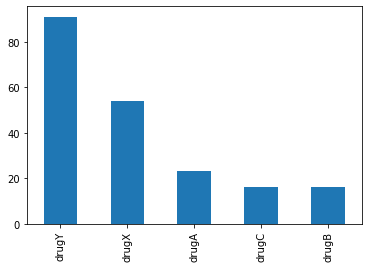

In [4]:
# Plot Distribution
drugs['Drug'].value_counts().plot(kind='bar')
drugs['Drug'].value_counts()

In [5]:
# Convert all ordinal and nominal features in numerical format
value_map = {
    "Sex": {"M": 0, "F": 1},
    "BP": {"LOW": 0, "NORMAL": 1, "HIGH": 2},
    "Cholesterol": {"NORMAL": 0, "HIGH": 1},
    "Drug": {"drugA": 0, "drugB": 1, "drugC": 2, "drugX": 3, "drugY": 4}
}

drugs_numeric = drugs.replace(value_map)
drugs_numeric.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,1,2,1,25.355,4
2,47,0,0,1,13.093,2
3,47,0,0,1,10.114,2
4,28,1,1,1,7.798,3
5,61,1,0,1,18.043,4


In [6]:
# Split Dataset
y = drugs_numeric["Drug"]
X_drug = drugs_numeric.loc[:, 'Age':'Na_to_K']

X_train, X_test, y_train, y_test = train_test_split(X_drug, y)

In [7]:
# Define Performance text file function
## Should accept: description_string, confusion matrix, precision, recall, f1-measure, accuracym macro-average f1, weighted-average f1

def generateReport(description_string, confusion_matrix, class_report, accuracy, macro_average_f1, weighted_average_f1):
  f = open("drugs_performance_1.txt", "a")
  f.write("\n==========================================================")
  f.write("\nAttempt Description: " + description_string)

  f.write("\nConfusion Martix:\n")
  f.write("\n")
  f.write(str(confusion_matrix))

  f.write("\nClassification Report (precision, recall, and F1-measure )\n")
  f.write(str(class_report))

  f.write("\nAccuracy:\n")
  f.write("\n")
  f.write(str(accuracy))

  f.write("\nMacro Average F1:\n")
  f.write("\n")
  f.write(str(macro_average_f1))

  f.write("\nWeighted Average F1:\n")
  f.write("\n")
  f.write(str(weighted_average_f1))
  
  f.close()

In [8]:
# Classify using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

# Append Performance
nb_cm = confusion_matrix(y_test, nb_pred)
nb_cr = classification_report(y_test, nb_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
nb_maf = f1_score(y_test, nb_pred, average = 'macro')
nb_waf = f1_score(y_test, nb_pred, average = 'weighted')

# report!
generateReport("Gaussian Naive-Bayes",nb_cm,nb_cr,nb_acc_score, nb_maf,nb_waf)

In [9]:
# Classify using Base Desicion Tree (tree.DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier
bdt_clf = DecisionTreeClassifier()
bdt_clf.fit(X_train, y_train)
bdt_pred = bdt_clf.predict(X_test)

# Append Performance
bdt_cm = confusion_matrix(y_test, bdt_pred)
bdt_cr = classification_report(y_test, bdt_pred)
bdt_acc_score = accuracy_score(y_test, bdt_pred)
bdt_maf = f1_score(y_test, bdt_pred, average = 'macro')
bdt_waf = f1_score(y_test, bdt_pred, average = 'weighted')

# Report
generateReport("Base Decision Tree",bdt_cm,bdt_cr,bdt_acc_score, bdt_maf,bdt_waf)

In [10]:
# Classify using Top Decision Tree (GridSearchCV)
from sklearn.model_selection import GridSearchCV
tdt_params = {'criterion':['gini','entropy'], 'max_depth':[3,7],'min_samples_split':[2,5,7] }
tdt_clf = GridSearchCV(bdt_clf,tdt_params)
tdt_clf.fit(X_train, y_train)
tdt_pred = tdt_clf.predict(X_test)

# Append Performance
tdt_cm = confusion_matrix(y_test, tdt_pred)
tdt_cr = classification_report(y_test, tdt_pred)
tdt_acc_score = accuracy_score(y_test, tdt_pred)
tdt_maf = f1_score(y_test, tdt_pred, average = 'macro')
tdt_waf = f1_score(y_test, tdt_pred, average = 'weighted')

# Report
generateReport("Top Decision Tree",tdt_cm,tdt_cr,tdt_acc_score, tdt_maf,tdt_waf)

In [11]:
# Classify using Perceptron
from sklearn.linear_model import Perceptron

pct_clf = Perceptron()
pct_clf.fit(X_train, y_train)
pct_pred = pct_clf.predict(X_test)

# Append Performance
pct_cm = confusion_matrix(y_test, pct_pred)
pct_cr = classification_report(y_test,pct_pred)
pct_acc_score = accuracy_score(y_test, pct_pred)
pct_maf = f1_score(y_test, pct_pred, average = 'macro')
pct_waf = f1_score(y_test, pct_pred, average = 'weighted')

# Report
generateReport("Perceptron",pct_cm,pct_cr,pct_acc_score, pct_maf,pct_waf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Classify using Base Multi-layered Perceptron (neural network.MLPClassifier)

from sklearn.neural_network import MLPClassifier
bmlp_clf = MLPClassifier()
bmlp_clf.fit(X_train, y_train)

bmlp_pred = bmlp_clf.predict(X_test)
# Append Performance
bmlp_cm = confusion_matrix(y_test, bmlp_pred)
bmlp_cr = classification_report(y_test, bmlp_pred)
bmlp_acc_score = accuracy_score(y_test, bmlp_pred)
bmlp_maf = f1_score(y_test, bmlp_pred, average = 'macro')
bmlp_waf = f1_score(y_test, bmlp_pred, average = 'weighted')

# Report
generateReport("Base Multi-Layered Perceptron",bmlp_cm,bmlp_cr,bmlp_acc_score, bmlp_maf,bmlp_waf)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Classify using Top Multi-layered Perceptron
# gridsearch

tmlp_params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['sgd', 'adam'], 'hidden_layer_sizes':[(30,30,30), (100,50,25)]}
tmlp_clf = GridSearchCV(bmlp_clf,tmlp_params)
tmlp_clf.fit(X_train, y_train)
tmlp_pred = tmlp_clf.predict(X_test)
# Append Performance
tmlp_cm = confusion_matrix(y_test, tmlp_pred)
tmlp_cr = classification_report(y_test, tmlp_pred)
tmlp_acc_score = accuracy_score(y_test, tmlp_pred)
tmlp_maf = f1_score(y_test, tmlp_pred, average = 'macro')
tmlp_waf = f1_score(y_test, tmlp_pred, average = 'weighted')

# Report
generateReport("Top Multi-Layered Perceptron",tmlp_cm,tmlp_cr,tmlp_acc_score, tmlp_maf,tmlp_waf)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
